## Drugs Arrested Case

### ปัจจัยที่ส่งผลต่อจำนวนคดีผู้ต้องหายาเสพติด
#### by กลุ่ม ทุกปัญหามีทางเข้าเสมอ
รายชื่อสมาชิก

6441142126 ปัญญชาติ พ่อค้าทอง

6441039226 ชญานิษฐ์ มีทองจันทร์

6441100826 ธัญพิชา นพจินดา

---


In [1]:
import pandas as pd
import numpy as np
import requests
import json, io, time, urllib3, re
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact
import plotly.express as px
urllib3.disable_warnings()

เกริ่นเรื่องปัญหายาเสพติดในไทย

- จำนวนคดีเคส เรียงตามจังหวัด เอาปีล่าสุด - เลือกจังหวัดแสดงผลได้
- ดูเทรนด์ rank top 3 แต่ละปี
- เอาจังหวัดที่น่าสนใจ(สถิติอยู่ในท็อป3บ่อย) ex.นครศรีธรรมราช กรุงเทพ ปทุม สงขลา ขอนแก่น
- ประชากรหนาแน่น ex.กรุงเทพ ขอนแก่น
- ดูเรื่องนักท่องเที่ยว ฟีลเมืองเศรษฐกิจ ex.ชลบุรี
- หัวข้อภาคใต้ เน้นนครศรี + เรื่องกระท่อม + อาชญากรรมอื่น
- การกินเหล้า & เล่นยาสวนทางกัน

### <u>Overview</u>

ปัญหายาเสพติดเป็นเหมือนโรคเรื้อรังที่กัดกินอนาคตของชาติไทยมานานหลายทศวรรษ แม้จะมีความพยายามจากทุกภาคส่วนในการแก้ไข แต่ปัญหานี้ยังคงฝังรากลึกในสังคมไทย

วันนี้กลุ่มของพวกเราจะมานำเสนอข้อมูลเกี่ยวกับยาเสพติด โดยเน้นไปที่จำนวนคดียาเสพติดในแต่ละจังหวัด พร้อมกับค้นหาว่าปัจจัยใดบ้างที่อาจส่งผลต่อจำนวนความมากน้อยของปัญหายาเสพติดได้ รวมไปถึงหยิบยก insights ที่น่าสนใจ ซึ่งเป็นสาเหตุที่ซ่อนอยู่ในตัวเลขยอดคดียาเสพติดของบางจังหวัดมานำเสนอเพิ่มเติม

*หมายเหตุ ข้อมูลจำนวนผู้ต้องหาคดียาเสพติดเป็นเพียงตัวเลขหนึ่งที่สะท้อนถึงปัญหายาเสพติด ว่ามีมากน้อยเพียงใด มิใช่ตัวเลขที่เป็นตัวแทนสะท้อนข้อมูลออกมาได้ทั้งหมด 

---


#### ref
pattern
- main page
- source
- as of

### <u>จำนวนคดีผู้ต้องหาคดียาเสพติด เรียงตามจังหวัด ปี 2565 </u>


In [2]:
df = pd.read_csv("./data/arrested_drug_cases.csv", encoding = "utf8")
df["budgetYear"] = df["budgetYear"].astype(str)

df_prov_th_en = pd.read_csv("./data/province_th_en.csv", encoding = "utf8")
df = pd.merge(df, df_prov_th_en, on='PROV_NAME', how='left').copy()

- bar chart แสดงเปรียบเทียบ 10 จังหวัดที่มีจำนวนคดียาเสพติดสูงสุด ในปี 2565

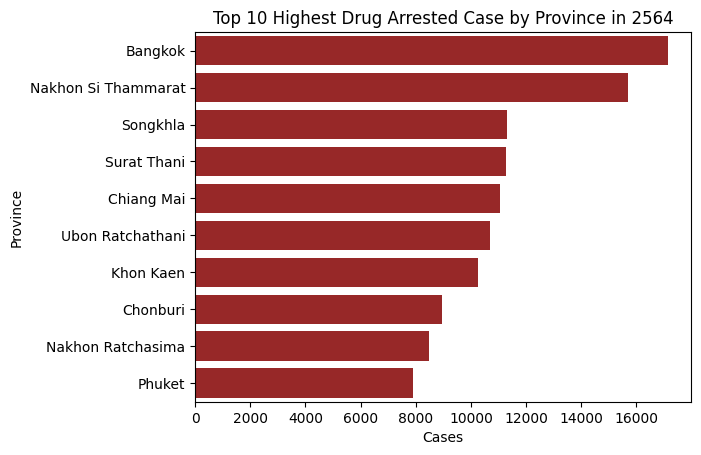

In [24]:
YEAR = "2564"
df_cases = df[['budgetYear', 'PROV_NAME', 'arrestAll_case', 'arrestAll_per', 'prov_en',]][df["budgetYear"] == YEAR].copy()
df_cases.sort_values("arrestAll_case", ascending = False, inplace = True)

df_top_x = df_cases[:10]

sns.barplot(
    data = df_top_x,
    x = "arrestAll_case",
    y = "prov_en",
    palette = ["#a91616" for _ in range(len(df_top_x))], # just to eliminate the warning
    hue = "prov_en", # just to eliminate the warning
)

plt.xlabel("Cases")
plt.ylabel("Province")
plt.title(f"Top 10 Highest Drug Arrested Case by Province in {YEAR}")
plt.show()

- แยกดูรายจังหวัดทุกปีได้

In [25]:
df_interact_prov = df[['budgetYear', 'PROV_NAME', 'arrestAll_case', 'arrestAll_per', 'prov_en']].copy()
provinces = sorted(df_interact_prov["PROV_NAME"].unique().tolist())

@interact
def bar_by_province(province = provinces):
    data = df_interact_prov[df["PROV_NAME"] == province]

    # average 2 years prior and after to fill the missing value
    avg = data[data["budgetYear"].isin(["2557", "2558", "2560", "2561"])]["arrestAll_case"].mean()
    data.loc[data["arrestAll_case"] == 0, "arrestAll_case"] = avg.astype(int)

    sns.barplot(
        data = data,
        x = "budgetYear",
        y = "arrestAll_case",
        palette = ["#a91616" for _ in range(len(data))], # just to eliminate the warning
        hue = "budgetYear", # just to eliminate the warning
    )

    prov_en = data["prov_en"].iloc[0]

    plt.ylabel("Cases")
    plt.xlabel("Year")
    plt.title(f"Number of Cases over the time in {prov_en}")

interactive(children=(Dropdown(description='province', options=('กระบี่', 'กรุงเทพมหานคร', 'กาญจนบุรี', 'กาฬสิ…

#### <u>Top 3 Province with Highest Drugs Arrested Case </u>

In [26]:
Top3 = df[["budgetYear", "PROV_NAME", "arrestAll_case"]].copy()
Top3["arrestAll_case"] = Top3["arrestAll_case"].astype(int)
Top3['rank'] = Top3.groupby(["budgetYear"])['arrestAll_case'].rank(method='min', ascending = False).copy()
RankTop3 = Top3[["budgetYear", "PROV_NAME", "arrestAll_case", "rank"]].copy()
RankTop3.columns = ["budgetYear", "province", "cases", "rank"]

@interact 
def filter_year(year=RankTop3["budgetYear"].unique()): 
    return RankTop3[RankTop3["budgetYear"]== year].sort_values(["budgetYear", "rank"])[["rank", "province", "cases"]].reset_index(drop = True)

interactive(children=(Dropdown(description='year', options=('2557', '2558', '2559', '2560', '2561', '2562', '2…

#### ปัจจัย
#### <u>ปัจจัยความหนาแน่นประชากร</u>


#### ref
pattern
- main page
- source
- as of

In [30]:
df_pop = pd.read_csv("./data/thailand_population_by_prov_year.csv")
df_pop = df_pop[df_pop["lsyymm"].astype(str).str.contains(r"^64")]
df_pop = df_pop[["lsccDesc", "lssumtotTot"]].copy()
df_pop.columns = ["province", "population"]
df_pop["province"] = df_pop["province"].str.replace("จังหวัด", "").copy()

df_area = pd.read_csv("./data/prov_area.csv", encoding = "utf8")
df_area.drop("Unnamed: 0", axis = 1, inplace = True)
df_area.columns = ["province", "area"]

df_density = pd.merge(left = df_pop, right = df_area, how = "left")
df_density["area"] = df_density["area"].apply(lambda x: re.sub(r"\[\d+(?!,)\]", "", x.replace(",", ""))).astype(float).copy()
df_density["density"] = round(df_density["population"] / df_density["area"])

with open("./data/provinces.geojson", encoding="utf8") as geo:
    geojson = json.load(geo)

state_id = {}
for feature in geojson["features"]:
    feature["id"] = feature["properties"]["pro_code"]
    state_id[feature["properties"]["pro_th"]] = feature["id"]

df_density["id"] = df_density["province"].apply(lambda x: state_id[x])
df_density["density_scale"] = np.log10(df_density["density"]).round(2)

fig = px.choropleth(
    geojson = geojson,
    data_frame = df_density,
    locations = "id",
    hover_name = "province",
    hover_data = "density",
    color = "density_scale",
    scope = "asia",
    color_continuous_scale="orrd",
)
fig.update_geos(fitbounds = "locations", visible = False)
fig.show()

In [31]:
#correlation ได้มั้ยนะ
tmp1 = df_cases[["PROV_NAME", "arrestAll_case"]].copy()
tmp1.columns = ["province", "cases"]
tmp2 = df_density[["province", "density"]].copy()

df_corr = pd.merge(left = tmp1, right = tmp2, on = "province", how = "left").copy()
df_corr.sort_values("cases", ascending = False)[["cases", "density"]].corr()

,cases,density
cases,1.000000,0.409797
density,0.409797,1.000000


#### <u>ปัจจัยทางเศรษฐกิจ การท่องเที่ยว</u>
- กรุงเทพ เชียงใหม่ สงขลา ขอนแก่น  (เดี๋ยวลองดูว่ามีตัวเลขเพิ่มเติมมั้ยมาให้เห็นว่าเป็นจังหวัดท่องเที่ยว) + ตรงนี้อาจจะเอากราฟมาให้ดูอีกที??
    ถ้าสังเกตุข้อมูลข้าง้ตนที่ได้นำเสนอไป จะเห็นได้ว่ามีหลายจังหวัด ใน Top 10 Highest  Drug Arrested Case นั้นเป็นประเทศที่มีความโดดเด่น และเป็นจังหวัดแห่งการท่องเที่ยวทั้งสำหรับคนไทย และต่างชาติ

 เดี๋ยวสรุปว่ามีส่วน แต่ไม่ได้เป็นปัจจัยสำคัญขนาดนั้น

#### ref
pattern
- main page
- source
- as of

In [32]:
#รายชื่อจังหวัดที่มีชาวต่างชาติมาเยือนมากสุด ปี 2565 https://www.thaipbs.or.th/news/content/322587
df_foreign = pd.read_csv("./data/อันดับจังหวัดที่มีชาวต่างชาติมาเยือน.csv",skiprows=1,skipfooter=2)
df_foreign.set_index('ลำดับที่',inplace = True)
df_foreign

C:\Users\punpu\AppData\Local\Temp\ipykernel_22532\539004617.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.



,จังหวัด,จำนวน(คน)
ลำดับที่,,
1,ภูเก็ต,2329894
2,ชลบุรี,975026
3,สุราษฎร์ธานี,606812
4,สงขลา,581808
5,เชียงใหม่,496111
6,สมุทรปราการ,321390
7,พังงา,317353
8,หนองคาย,231243
9,กระบี่,217526


In [33]:
# 10 จังหวัดนักท่องเที่ยวสูงสุด ปี 2565 https://www.thaipbs.or.th/now/infographic/56
df_tourist = pd.read_csv("./data/10จังหวัดนักท่องเที่ยวสูงสุด.csv")
df_tourist.set_index('ลำดับที่',inplace = True)
df_tourist

,จังหวัด,จำนวน (ล้านคน)
ลำดับที่,,
1,กรุงเทพ,30.80
2,ชลบุรี,10.79
3,กาญจนบุรี,9.34
4,ประจวบคีรีขันธ์,7.70
5,เพชรบุรี,7.28
6,เชียงใหม่,6.67
7,อยุธยา,6.26
8,นครราชสีมา,4.85
9,ภูเก็ต,4.08


ประเทศไทยนั้นนับว่าเป็นประเทศแห่งการท่องเที่ยว และการท่องเที่ยวก็เป็นแหล่งที่มาของรายได้ที่สำคัญของประเทศไทย
แต่ทว่าการเติบโตของธุรกิจท่องเที่ยวที่มากและเร็ว จนบางทีไม่สามารถควบคุมให้อยู่ภายใต้กรอบกฎหมายได้ทั้งหมด

ถ้าดูข้อมูลจากตารางด้านบน จะเห็นว่าบางจังหวัดที่มีความโดดเด่นในเรื่องการท่องเที่ยว เช่น กรุงเทพ เชียงใหม่ เชียงราย สงขลา นครราชสีมา สุราษฎร์ธานี ก็อยู่ในอันดับของจังหวัดที่มีคดียาเสพติดสูงสุด 10 อันดับ ในปี 2565
ซึ่งการท่องเที่ยวก็เป็นสาเหตุนึงที่ทำให้ปัญหายาเสพติดเพิ่มมากขึ้นได้ เพราะ
ในบางพื้นที่เลือกที่ธุรกิจก็เลือกใช้การท่องเที่ยวแบบด้อยคุณภาพ มาเป็นสิ่งดึงดูดนักท่องเที่ยว

#### <u>ปัจจัยจำนวนคนว่างงาน</u>

In [1]:
df_unemploy = pd.read_csv("./data/10จังหวัดนักท่องเที่ยวสูงสุด.csv")
df_unemploy

NameError: name 'pd' is not defined

#### <u>Southern Province Insights </u>
พวกเราอาจเคยได้ยินข่าวเรื่องการลักลอบนำเข้าขนส่งยาเสพติดกันบ่อยๆ ตามแถบชายแดนติดฝั่งพม่า หรือทางฝั่งภาคเหนือ

แต่จากข้อมูลจะพบได้ว่าจังหวัดในภาคใต้ก็มีจำนวนปัญหายาเสพติดไม่น้อยหน้าเช่นกัน

เวลาจับกุมคดีเกี่ยวกับยาเสพติดได้นั้น ไม่ว่าจะจับได้ที่ส่วนไหนของประเทศไทยผู้ต้องหามักจะให้การว่าจะส่งยาไปยังชายแดนใต้ ถึงแม้ว่าตรงชายแดนใต้จะไม่ได้มีการตั้งโรงงานผลิตยา แต่เป็นพื้นที่พักยา เพื่อทำการส่งไปยังประเทศมาเลยเซีย และทวีปอื่นๆทั่วโลก

โดยหนึ่งในสาเหตุที่ทำให้ยาเสพติดแพร่ระบาดเยอะคือกระบวนการค้ายาเสพติดถูกสกัดจับได้เพียงแค่ประมาณ 10% จากปริมารการลักลอบนำเข้าทั้งหมด
และนอกการการเสพติดพวกยาบ้า ยาไอซ์ ฝิ่นแล้ว ยังเป็นพื้นที่ปลูกพืชยาเสพติด โดยพืชกระท่อมนับเป็นสิ่งที่นิยมกันมากในภาคใต้ เนื่องจากมีราคาถูก

-   อย่างเช่นกรณีจังหวัดสงขลา

    ในจังหวัดสงขลามีช่องทางสำหรับการลักลอบนำเข้ายาเสพติดจำนวนมาก ทั้งด่านที่เป็นด่านศุลการกร ด่านตรวจคนเข้าเมือง จุดตรวจพรมแดนต่างๆ รวมถึงมีช่องทางธรรมชาติ และยังเป็นจังหวัดที่มีชายแดนติดกับประเทศมาเลเซียด้วย สามารถเข้าออกประเทศกันได้ง่าย 


#### <u>Reversion of Drugs & Alcohol Consumption</u>

ยาเสพติดและเครื่องดื่มแอลกอฮอล์ต่างก็เป็นสารเสพติดเช่นเดียวกัน ดังนั้นหลายคนจึงอาจจะคิดว่าปัญหายาเสพติดและปัญหาการบริโภคเครื่องดื่มแอลกอฮอล์นั้นควรจะมีแนวโน้มไปในทิศทางเดียวกัน ผู้ที่ติดยาเสพติดส่วนใหญ่ก็มีแนวโน้มที่จะติดสุราและดื่มเครื่องดื่มแอลกอฮอล์เป็นประจำด้วย 

รวมไปถึงผลสำรวจก็พบว่า การติดยาเสพติดโดยเฉพาะในกลุ่มวัยรุ่นจะเริ่มจากการดื่มเครื่องดื่มแอลกอฮอล์ การสูบบุหรี่ ก่อนจะนำไปสู่สารเสพติดชนิดอื่นๆที่มีความรุนแรงขึ้นเรื่อยๆ

แต่จากข้อมูลกลับมีจุดน่าสังเกตที่ว่า ภูมิภาคใต้ที่มีผู้ดื่มสุราหรือเครื่องดื่มแอลกอฮอล์และมีความเสี่ยงต่อปัญหาแอลกอฮอล์น้อยที่สุดกลับเป็นภูมิภาคที่มีคดียาเสพติดสูงที่สุด 
เช่น จังหวัดนครศรีธรรมราช สงขลา สุราษฎร์ธานี ซึ่งเป็นจังหวัดที่มีคดียาเสพติดสูงสุด 

ในทางกลับกัน จังหวัดที่อยู่ในภาคเหนือ เช่น แม่ฮ่องสอน แพร่ น่าน เชียงราย ที่มีปัญหายาเสพติดน้อย กลับเป็นจังหวัดที่มีความเสี่ยงต่อปัญหาแอลกอฮอล์สูงสุดในประเทศไทย

#### ref
pattern
- main page
- source
- as of

#### Top 10

In [40]:
df_alcohol = pd.read_csv("./data/alcohol_consump64.csv", encoding = "utf8")
df_alcohol.drop("#", axis = 1, inplace = True)
df_alcohol.drop(0, inplace = True)
df_alcohol["ปีที่สำรวจ"] = df_alcohol["ปีที่สำรวจ"].astype(int)
df_alcohol["นักดื่ม"] = df_alcohol["นักดื่ม"].astype(float).copy()
df_alcohol = df_alcohol[["ปีที่สำรวจ", "จังหวัด", "นักดื่ม"]].sort_values("นักดื่ม", ascending = False)

df_cases["rank"] = df_cases["arrestAll_case"].rank(method = "min", ascending = False).astype(int)

df_compare = pd.merge(left = df_alcohol, right = df_cases, left_on = "จังหวัด", right_on = "PROV_NAME", how = "left")[["ปีที่สำรวจ", "จังหวัด", "นักดื่ม", "arrestAll_case", "rank"]].head(10).copy()
df_compare

,ปีที่สำรวจ,จังหวัด,นักดื่ม,arrestAll_case,rank
0,2564,น่าน,43.3,3577,35
1,2564,แพร่,42.9,3745,31
2,2564,เชียงราย,41.4,7665,11
3,2564,สระแก้ว,41.0,2432,58
4,2564,พะเยา,40.7,3396,39
5,2564,ขอนแก่น,39.9,10242,7
6,2564,สุรินทร์,39.2,3513,37
7,2564,มุกดาหาร,38.6,3705,33
8,2564,ลำพูน,37.1,3592,34
9,2564,ลำปาง,36.5,4711,24


#### Tail 10

In [42]:
df_compare = pd.merge(left = df_alcohol, right = df_cases, left_on = "จังหวัด", right_on = "PROV_NAME", how = "left")[["ปีที่สำรวจ", "จังหวัด", "นักดื่ม", "arrestAll_case", "rank"]].tail(10).copy()
df_compare.sort_values("นักดื่ม").reset_index(drop = True)

,ปีที่สำรวจ,จังหวัด,นักดื่ม,arrestAll_case,rank
0,2564,ปัตตานี,1.6,4693,25
1,2564,นราธิวาส,2.4,3568,36
2,2564,ยะลา,3.3,3215,43
3,2564,สตูล,9.8,2991,47
4,2564,สมุทรสงคราม,12.6,298,77
5,2564,พังงา,14.4,3068,45
6,2564,สุพรรณบุรี,15.1,2774,51
7,2564,สงขลา,16.4,11321,3
8,2564,ระนอง,16.9,2722,52
9,2564,สิงห์บุรี,18.7,1053,73


##### แล้วทำไมคนภาคใต้ถึงมีสัดส่วนนักดื่มน้อยที่สุด?

จากการวิเคราะห์ค้นพบว่ามีสาเหตุเนื่องมาจากภาคใต้เป็นภาคที่มี<b>สัดส่วนคนนับถือศาสนาอิสลามมากที่สุด</b> 
ซึ่งเป็นศาสนาที่มีข้อห้ามในการข้องเกี่ยวกับสิ่งมึนเมาโดยเด็ดขาด แต่ทั้งนี้ก็ขึ้นอยู่กับความเคร่งครัดของแต่ละบุคคล ท้องที่ หรือจังหวัดนั้น ๆ ด้วยเช่นกันนอกจากนี้ยังมี<b>เรื่องของความปลอดภัย</b>ที่กระทบต่อการสังสรรค์หรือรื่นเริง เช่น จังหวัดนครศรีธรรมราช จังหวัดชายแดนภาคใต้ ทำให้ผู้คนในภาคใต้ไม่ตัดสินใจเลือกที่จะมานั่งดื่มกินกัน 

ในส่วนของภาคเหนือซึ่งมีสัดส่วนนักดื่มเยอะเป็นอันดับหนึ่งของประเทศนั้น คาดว่าเป็นเพราะภาคเหนือ<b>เป็นแหล่งรวมวัฒนธรรมประเพณีที่มีความหลากหลาย</b> ส่งผลให้เกิดการดื่มเฉลิมฉลองในบางเทศกาลหรืองานรื่นเริงบ่อยครั้ง และด้วย<b>บรรยากาศที่ค่อนข้างหนาว ทัศนียภาพส่วนใหญ่เป็นภูเขา ประกอบกับภูมิศาสตร์ต่าง ๆ ที่ไม่เอื้ออำนวย</b>ให้ทำกิจกรรมอื่น ๆ มากนัก ทำให้ผู้คนในชุมชนจึงมักเลือกการสังสรรค์เป็นกิจกรรมในการเพิ่มระดับความสัมพันธ์ของพวกเขา

รวมทั้งด้วย<b>สภาพเศรษฐกิจในระดับภาคยังมีความกระจุกและเติบโตน้อย</b> ส่งผลให้สัดส่วนคนจนมีเยอะ ซึ่งสภาพเศรษฐกิจเหล่านี้เองที่ส่งผลต่อระดับความเครียดของผู้คนและอาจทำให้เกิดการดื่มเพื่อบรรเทาความเครียดได้เช่นกัน ประกอบกันจังหวัดต่างๆ ในภาคเหนือ มีการทำสุราท้องถิ่นมากเป็นอันดับต้น ๆ ของประเทศอีกด้วย โดยจังหวัดน่านเป็นจังหวัดที่มีสัดส่วนนักดื่มเยอะมากที่สุดในประเทศไทย โดยมีมากถึง 43% เลยทีเดียว 

### สรุป

ถึงแม้ว่าปัจจัยที่เรายกมาในงานครั้งนี้ จะมีส่วนที่ส่งผลต่อปัญหายาเสพติดของประเทศไทยได้ แต่ก็ไม่ใช่ปัจจัยทั้งหมด เป็นเพียงแค่ปัจจัยภายนอกและเพียงส่วนหนึ่งเท่านั้น

ยังมีอีกหลายปัจจัย ไม่ว่าจะเป็นสภาพสังคมที่เราอยู่ บลาๆๆ แต่สุดท้ายแล้วมันก็เป็นเรื่องปัจเจกบุคคล การเลือกที่จะมาข้องเกี่ยวกับยาเสพติดล้วนเป็นการตัดสินใจของคนๆนั้นเองทั้งนั้น ดังนั้นเราควรจะมาให้ความสำคัญกับการปลูกฝัง ปลูกจิตสำนึกให้คนในชาติมากกว่า



### ข้อเสนอแนะ

- การสร้างชุมชนเข้มแข็ง โดยเฉพาะจังหวัดหรือพื้นที่ที่มีประชากรหนาแน่น ควรช่วยกันสอดส่องดูแล และปลูกฝัง สร้างภูมิคุ้มกันให้แก่เด็กตั้งแต่ต้น

- การเพิ่มความเข้มงวดของตัวกฎหมาย รวมถึงในจังหวัดท่องเที่ยวต่างๆถึงตัวเลขคดียาเสพติดอาจไม่ได้สอดคล้องมีความสัมพันธ์

---
### References
- https://alcoholstudy.in.th/index.php?ct=report_drinker_province&proc=main&year=2564&chart_id=5&len=10&page=0&key=
- https://www.thaihealth.or.th/%E0%B8%AB%E0%B9%88%E0%B8%A7%E0%B8%87%E0%B8%9B%E0%B8%B1%E0%B8%8D%E0%B8%AB%E0%B8%B2%E0%B8%A2%E0%B8%B2%E0%B9%80%E0%B8%AA%E0%B8%9E%E0%B8%95%E0%B8%B4%E0%B8%94-%E0%B8%A3%E0%B8%B0%E0%B8%9A%E0%B8%B2%E0%B8%94/
- https://www.phufaresthome.com/blog/drug-issue-in-thai-teenager/
- https://www.agenda.co.th/social/alcohol-consumption-thailand/
- https://www.parliament.go.th/ewtadmin/ewt/parliament_parcy/ewt_dl_link.php?nid=45110
- https://www.bbc.com/thai/40024683
- https://mgronline.com/south/detail/9620000106545
- https://catalog.nso.go.th/en/dataset/0706_02_0003/resource/71a8b59d-2a0f-4f9d-b2f5-c8e6b0730ca3